In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
df = pd.read_csv('ccdefault.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 25)

# Part 1: Random test train splits

Data cleaning

In [10]:
X=df.drop(['ID','DEFAULT'],axis=1).values
y=df['DEFAULT'].values
print(X.shape,y.shape)
print(X[0], y[0])

(30000, 23) (30000,)
[20000     2     2     1    24     2     2    -1    -1    -2    -2  3913
  3102   689     0     0     0     0   689     0     0     0     0] 1


Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
scores_train=[]
scores_test=[]
tree = DecisionTreeClassifier(criterion='gini',max_depth=20)
for n in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=n)
    tree.fit(X_train,y_train)
    y_train_pred1 = tree.predict(X_train)
    y_pred1 = tree.predict(X_test)
    scores_train.append(metrics.accuracy_score(y_train, y_train_pred1))
    scores_test.append(metrics.accuracy_score(y_test, y_pred1))

scores_train:[0.9435925925925925, 0.9458888888888889, 0.9427407407407408, 0.9440740740740741, 0.937962962962963, 0.9484444444444444, 0.9406666666666667, 0.9318888888888889, 0.9444074074074074, 0.9431481481481482]
scores_test:[0.7613333333333333, 0.7606666666666667, 0.7673333333333333, 0.75, 0.7646666666666667, 0.746, 0.7756666666666666, 0.7656666666666667, 0.7616666666666667, 0.77]
The mean of scores_train:0.9422814814814815
The std of scores_train:0.004366608550488136
The mean of scores_test:0.7623
The std of scores_test:0.008373834910667337


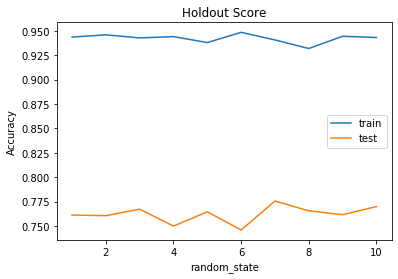

In [36]:
print("scores_train:"+str(scores_train))
print("scores_test:"+str(scores_test))
print("The mean of scores_train:"+str(np.mean(scores_train)))
print("The std of scores_train:"+str(np.std(scores_train)))
print("The mean of scores_test:"+str(np.mean(scores_test)))
print("The std of scores_test:"+str(np.std(scores_test)))
plt.title('Holdout Score')
plt.plot(range(1,11),scores_train)
plt.plot(range(1,11),scores_test)
plt.legend(['train', 'test'])
plt.xlabel('random_state')
plt.ylabel('Accuracy')
plt.show()

# Part 2: Cross validation

K_fold with n=10

The train score is :[0.93888889 0.93807407 0.93914815 0.94837037 0.94766667 0.95051852
 0.95240741 0.94355556 0.94222222 0.94166667]
The mean of train score:0.9442518518518519
The std of train score is:0.00488537471903688
The scores of test score:[0.74833333 0.75733333 0.75133333 0.74333333 0.74266667 0.76266667
 0.76566667 0.78       0.778      0.76666667]
The mean of test score:0.7595999999999999
The std of test score:0.01265947164072114


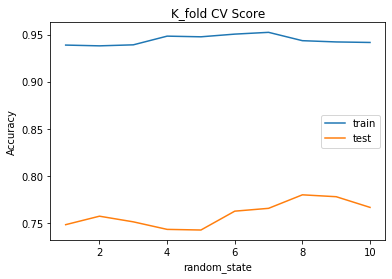

In [41]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
scores = cross_validate(tree,X,y,cv=skf,scoring='accuracy',return_train_score=True)
print("The train score is :"+str(scores['train_score']))
print("The mean of train score:"+str(np.mean(scores['train_score'])))
print("The std of train score is:"+str(np.std(scores['train_score'])))
print("The scores of test score:"+str(scores['test_score']))
print("The mean of test score:"+str(np.mean(scores['test_score'])))
print("The std of test score:"+str(np.std(scores['test_score'])))
plt.title('K_fold CV Score')
plt.plot(range(1,11),scores['train_score'])
plt.plot(range(1,11),scores['test_score'])
plt.legend(['train', 'test'])
plt.xlabel('random_state')
plt.ylabel('Accuracy')
plt.show()

In [39]:
print("My name is Zhiyi Ye")
print("My NetID is: zhiyiye2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhiyi Ye
My NetID is: zhiyiye2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
